## Домашнее творческое задание по дисциплине "Технологии обработки больших данных"

Выполнил: студент группы __ПМ20-2 Макеев Владимир Вадимович__

Вариант: __67__

    

__Задание 1__. В файле `steam_games.json` находится информация об играх из магазина Steam. При помощи пакета `json` считайте файл. Выведите на экран количество игр, которые стоят (без скидки) более 40\$. В файле `steam_games.xml` находится информация об играх из магазина Steam. При помощи пакета `bs4` считайте файл. Выведите на экран количество игр, скидка на которые была больше 20\$.

In [2]:
import json

with open('steam_games.json', 'r', encoding='utf-8') as f:
    templates = json.load(f)


In [3]:
count = 0 
for game in templates:
    try:
        if float(game['original_price'][1:]) > 40.0:
            count +=1 
    except:
        continue
print(f'{count} игр стоят более 40$ без скидки')

386 игр стоят более 40$ без скидки


In [4]:
from bs4 import BeautifulSoup as Soup
with open('steam_games.xml', 'r', encoding='utf-8') as xml:
        soup = Soup(xml.read(), 'lxml')


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [5]:
games = soup.find_all('game')
count = 0
for price in games:
    try:
        
        if (float(price.find('original_price').text[1:]) - float(price.find('discount_price').text[1:])) > 20.0:
            count += 1 
    except: 
        continue
print(f'{count} игр, скидка на которые была больше 20$')    

279 игр, скидка на которые была больше 20$


__Задание 2__. Преобразуйте данные из файла, предложенного в задании 1, в `pd.DataFrame` и свяжите его с переменной `games_df`. Удалите столбцы, содержащие более 65% пропусков. Сгруппируйте таблицу по столбцу `types`. Для каждой группы найдите среднее значение столбца `reviews_cnt`. Добавьте в таблицу столбец `interest`, заполненный по следующему правилу: если значение `reviews_cnt` для строки меньше, чем среднее по соответствующей группе, то в `interest` укажите `low`; иначе `high`.

In [6]:
import pandas as pd
games_df = pd.read_json('steam_games.json')
games_df.head(2)


,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,None,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0


In [7]:
cut_off = games_df.shape[0]*0.65
cut_off
games_df.isnull().sum()

url                            0
types                          0
name                           2
desc_snippet                3231
release_date                 794
developer                     76
publisher                   1191
popular_tags                   0
game_details                   0
languages                      0
achievements                6930
game_description             724
mature_content              9297
minimum_requirements        4878
recommended_requirements    4878
original_price              1986
discount_price              6332
reviews_mood                   0
reviews_cnt                    0
genres                         0
avg_rating_users               0
avg_rating_critics             0
selled                      1986
dtype: int64

In [8]:
games_df = games_df.loc[:, (games_df.isnull().sum(axis=0) <= cut_off)]
games_df.isnull().sum()
mean_val = games_df.groupby('types')['reviews_cnt'].mean()
mean_val


types
app       10281.925524
bundle    10446.136578
sub       10057.758621
Name: reviews_cnt, dtype: float64

In [9]:
import numpy as np
games_df['reviews_cnt']
games_df['interest'] = np.where(games_df['reviews_cnt'] < mean_val[games_df[['types', 'reviews_cnt']]['types']].reset_index(drop = True), 'low', 'high')
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,low
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,None,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,low
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,None,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0,low
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,None,"Jun 3, 2016","SmiteWorks USA, LLC",None,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,None,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0,high
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,None,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,None,None,$120.71,neutral,8573,[Racing],80,27,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,None,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,None,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0,low
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,None,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,Graphics:,Laptop versions of thes...",$4.99,None,very negative,9512,[Simulation],22,90,1088.0,low
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,None,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0,high
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,None,$2.99,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,1257.0,low


__Задание 3__. Выберите из таблицы `games_df` столбцы `avg_rating_users` и `avg_rating_critics`. Преобразуйте полученный набор данных в массив `numpy`. Известно, что существуют такие $i\in I$ и $j \in I$, что $u_i+c_j = 131$. Найдите хотя бы одну пару $(i, j)$, выведите ее на экран, а также выведите на экран элементы, дающие эту сумму. Здесь где $u_i$ - значение столбца `avg_rating_users` для $i$-й строчки; $c_j$ - значение столбца `avg_rating_critics` для $j$-й строчки; $I$ - множество номеров строк.

НИЖЕ ДЛЯ Ui+Ci = 131

In [10]:
games_df[['avg_rating_users', 'avg_rating_critics']]
arr = games_df[['avg_rating_users', 'avg_rating_critics']].iloc[:,:].values
new_arr = arr[arr.sum(axis =1) == 131]
print(new_arr)
list_ = arr.tolist()
print(list_.index(new_arr.tolist()[1]))

[[61 70]
 [42 89]
 [85 46]
 [95 36]
 [81 50]
 [67 64]
 [40 91]
 [93 38]
 [84 47]
 [38 93]
 [48 83]
 [37 94]
 [80 51]
 [90 41]
 [94 37]
 [86 45]
 [40 91]
 [53 78]
 [60 71]
 [50 81]
 [99 32]
 [47 84]
 [54 77]
 [43 88]
 [45 86]
 [56 75]
 [95 36]
 [63 68]
 [91 40]
 [54 77]
 [96 35]
 [67 64]
 [65 66]
 [36 95]
 [90 41]
 [40 91]
 [92 39]
 [53 78]
 [56 75]
 [87 44]
 [47 84]
 [78 53]
 [65 66]
 [69 62]
 [76 55]
 [47 84]
 [50 81]
 [70 61]
 [73 58]
 [40 91]
 [45 86]
 [76 55]
 [59 72]
 [35 96]
 [47 84]
 [96 35]
 [79 52]
 [89 42]
 [56 75]
 [60 71]
 [85 46]
 [71 60]
 [47 84]
 [67 64]
 [40 91]
 [57 74]
 [94 37]
 [32 99]
 [71 60]]
78


НИЖЕ ДЛЯ Ui+Cj = 131

In [11]:
games_df[['avg_rating_users', 'avg_rating_critics']]
arr = games_df[['avg_rating_users', 'avg_rating_critics']].iloc[:,:].values

list_ = arr.tolist()
count = 0
listt = []
indexes = []
for first in range(len(list_)): 
    for second in range(len(list_)):
        if list_[first][0] + list_[second][1] == 131 and [list_[first][0], list_[second][1]] not in listt:
            indexes.append([first, second])
            listt.append([list_[first][0], list_[second][1]])
            count += 1

In [12]:
print(f'i, j = {indexes}')


print(f'Список элементов {listt}')

i, j = [[0, 98], [1, 104], [2, 121], [3, 17], [4, 6], [6, 29], [8, 24], [9, 21], [10, 202], [12, 75], [13, 282], [16, 28], [17, 54], [18, 120], [20, 150], [23, 61], [24, 22], [25, 129], [26, 175], [28, 20], [29, 78], [30, 147], [34, 57], [36, 45], [37, 93], [38, 68], [42, 101], [43, 404], [44, 424], [46, 7], [47, 1], [48, 0], [50, 70], [51, 87], [53, 9], [57, 184], [58, 215], [61, 11], [63, 134], [70, 14], [72, 37], [73, 42], [76, 10], [77, 38], [83, 2], [85, 83], [86, 158], [90, 82], [94, 18], [99, 40], [102, 189], [103, 47], [110, 69], [114, 96], [118, 143], [123, 3], [125, 544], [134, 55], [144, 15], [151, 73], [174, 12], [180, 5], [230, 110], [238, 52], [280, 36], [303, 16], [409, 475], [750, 217]]
Список элементов [[77, 54], [94, 37], [58, 73], [51, 80], [80, 51], [74, 57], [66, 65], [61, 70], [87, 44], [40, 91], [38, 93], [46, 85], [79, 52], [73, 58], [84, 47], [34, 97], [86, 45], [59, 72], [75, 56], [93, 38], [42, 89], [81, 50], [47, 84], [41, 90], [95, 36], [99, 32], [57, 74], 

__Задание 4__. Преобразуйте столбец `original_price` в числовой. Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца. Постройте график ядерной оценки плотности этого столбца. Сделайте цвет графика зеленым, добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите вертикальную линию от точки глобального максимума построенной функции до оси $y=0$. Сделайте эту вертикальную линию зеленой и пунктирной и укажите толщину линии 0.5. 

* Примечание: точку глобального максимума разрешается определить визуально на основе графика или численно, воспользовавшись функцией для построения оценки, например [вот этой](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde).

In [13]:
games_df['original_price'] = pd.to_numeric(games_df['original_price'].str[1:])

In [14]:
games_df['original_price'].head()

0     3.99
1    14.99
2    14.99
3     9.99
4      NaN
Name: original_price, dtype: float64

In [15]:
third_quant = games_df['original_price'].quantile(0.75)

In [16]:
games_df_new = games_df.loc[games_df['original_price'] > third_quant]
games_df_new.head()


,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",14.99,None,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,low
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,None,14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0,low
6,https://store.steampowered.com/app/993932/RPG_...,app,RPG Maker MV - Storytellers Music Pack Vol.1,None,"Dec 20, 2018",Joel Steudler,"Degica,Degica","[Design & Illustration, Web Publishing]","[Downloadable Content, Steam Trading Cards, Pa...","[{'lang': 'Italian', 'rank': 0}, {'lang': 'Tra...",...,None,24.99,None,neutral,16019,"[Design & Illustration, Web Publishing]",74,51,100.0,high
8,https://store.steampowered.com/app/497160/Voic...,app,Voice Again,You can slow down any recording without changi...,"Aug 8, 2016",Screaming Bee,"Screaming Bee,Screaming Bee","[Utilities, Audio Production]","[Steam Cloud, Stats]","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows 7,Processor:,Intel i5...",19.99,None,very positive,6984,"[Audio Production, Utilities]",66,6,100.0,low
9,https://store.steampowered.com/app/597760/Yupp...,app,Yuppie Psycho,Join Brian Pasternack on his first day at one ...,"Apr 25, 2019",Baroque Decay,"Another Indie,Another Indie","[Indie, Adventure, Gore, Violent, Horror, Pixe...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Tra...",...,"Recommended:,Requires a 64-bit processor and o...",16.66,None,negative,15574,"[Adventure, Indie]",61,96,100.0,high


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


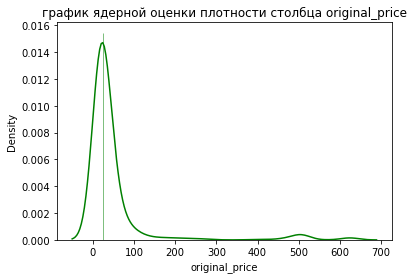

In [17]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

sb.distplot(games_df_new['original_price'], hist=False, color='green', ax=ax)
max_y_val = list(ax.get_ylim())[1]
max_y_val
ax.vlines(23.3, 0, max_y_val, colors='green', linewidth = 0.5)
plt.title('график ядерной оценки плотности столбца original_price')
plt.show()

In [18]:
max_y_val = list(ax.get_ylim())[1]
max_y_val

0.016211226175648512

__Задание 5__. Для каждого описания из столбца `game_description` таблицы `games_df` выясните, сколько в нем содержится предложений и слов. Добавьте 2 столбца: `n_words` и `n_sents`. В столбце  `n_words` укажите количество слов в описании. В столбце `n_sents` укажите количество предложений в описании. Для тех описаний, в которых больше 30 предложений, найдите топ-5 самых часто используемых слов.

In [19]:
games_df_new['game_description']
games_df_new['n_words'] = games_df_new['game_description'].str.split()
games_df_new['n_words'] = games_df_new['n_words'].str.len()
games_df_new['n_sents'] = games_df_new['game_description'].str.split(".")
games_df_new['n_sents'] = games_df_new['n_sents'].str.len()
games_df_new[games_df_new['n_sents'] > 30]

C:\Users\Владимир\AppData\Local\Temp\ipykernel_19352\1539238719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df_new['n_words'] = games_df_new['game_description'].str.split()
C:\Users\Владимир\AppData\Local\Temp\ipykernel_19352\1539238719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df_new['n_words'] = games_df_new['n_words'].str.len()
C:\Users\Владимир\AppData\Local\Temp\ipykernel_19352\1539238719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest,n_words,n_sents
34,https://store.steampowered.com/app/754790/Fiel...,app,Field of Glory II: Legions Triumphant,None,"Mar 8, 2018",Byzantine Games,"Slitherine Ltd.,Slitherine Ltd.","[Strategy, Simulation]","[Single-player, Multi-player, Shared/Split Scr...","[{'lang': 'Spanish - Spain', 'rank': 0}, {'lan...",...,$83.94,positive,9166,"[Simulation, Strategy]",47,57,100.0,low,641.0,34.0
142,https://store.steampowered.com/app/785930/Comm...,app,Command: The Silent Service,Submarine warfare from post-WW2 to the present...,"Mar 1, 2018",WarfareSims,"Slitherine Ltd.,Slitherine Ltd.","[Strategy, Simulation]",[Single-player],"[{'lang': 'English', 'rank': 0}]",...,$89.98,very positive,16014,"[Simulation, Strategy]",17,58,100.0,high,742.0,38.0
163,https://store.steampowered.com/app/696250/Lost...,app,Lost Shipwreck,"You wrecked on a deserted island, alone and de...","Sep 29, 2017",Blueplant Entertainment,"Blueplant Entertainment,Blueplant Entertainment","[Early Access, Simulation, Indie, Adventure, E...","[Single-player, Steam Achievements, Steam Work...","[{'lang': 'Spanish - Spain', 'rank': 0}, {'lan...",...,None,very positive,12786,"[Adventure, Indie, Simulation, Early Access]",37,85,100.0,high,728.0,33.0
173,https://store.steampowered.com/app/518790/theH...,app,theHunter: Call of the Wild™,Experience the thrill of the hunt in a visuall...,"Feb 16, 2017",Expansive Worlds,"Avalanche Studios,Avalanche Studios","[Hunting, Open World, Multiplayer, Simulation,...","[Single-player, Multi-player, Steam Achievemen...","[{'lang': 'Czech', 'rank': 0}, {'lang': 'Russi...",...,$39.97,very negative,15160,"[Adventure, Simulation, Sports]",95,43,100.0,high,585.0,39.0
225,https://store.steampowered.com/app/505080/Gaku...,app,Gakuen Club,Gakuen Club is a school life love story that b...,"May 9, 2017",OperaHouse Corporation,"Dogenzaka Lab,Dogenzaka Lab","[Adventure, Otome, Visual Novel, Female Protag...","[Single-player, Steam Achievements, Steam Trad...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'En...",...,$53.98,positive,5965,[Adventure],40,90,100.0,low,565.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,https://store.steampowered.com/app/444690/TRAP...,app,TRAPPED,"In TRAPPED, you play as a survivor from the to...","Jun 30, 2018",Forthright Entertainment,"Forthright Entertainment,Forthright Entertainment","[Early Access, Action, Early Access, Adventure...","[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'English', 'rank': 0}]",...,None,neutral,13589,"[Action, Adventure, Indie, Early Access]",62,49,100.0,high,522.0,32.0
9848,https://store.steampowered.com/app/493180/Dyna...,app,Dynasty Feud,"Dynasty Feud is a competitive, team-based, fas...","May 23, 2017",Kaia Studios,"Kaia Studios,Kaia Studios","[Action, Indie, Multiplayer, 4 Player Local, F...","[Multi-player, Online Multi-Player, Local Mult...","[{'lang': 'Russian', 'rank': 0}, {'lang': 'Por...",...,None,positive,12482,"[Action, Indie]",43,56,100.0,high,528.0,44.0
9951,https://store.steampowered.com/app/792000/Pit_...,app,Pit Blocks 3D,Pit Blocks 3D is a cube-matching arcade style ...,"Sep 27, 2018",SRM Games,"SRM Games,SRM Games","[Casual, Indie, Strategy, Puzzle]","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,None,very negative,16524,"[Casual, Indie, Strategy]",66,90,100.0,high,488.0,38.0
9967,https://store.steampowered.com/app/504720/Musi...,app,Music Maker 2017 Premium Steam Edition,Music Maker Premium Steam Edition is a unique ...,"Aug 8, 2016",MAGIX Software GmbH,"MAGIX Software GmbH,MAGIX Software GmbH",[Audio Production],[],"[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,$23.99,neutral,3811,[Audio Production],56,21,100.0,low,525.0,38.0


In [20]:
from collections import Counter
words = games_df_new[games_df_new['n_sents'] > 30]['game_description'].str.split().tolist()[1]

c = Counter(words).most_common()[0:5]
c

[('the', 47), ('and', 32), ('of', 28), ('to', 22), ('in', 17)]

__Задание 6__. Сохрание текущее состояние `games_df` в рабочую книгу "games.xlsx". Для каждого числового столбца при помощи протягиваемых формул Excel найдите среднее значение элементов в столбце. Поместите результаты вычислений после таблицы с данными. Добавьте в строку со средними значениями цветовую шкалу от синего (ближе к минимуму) до зеленого (ближе к максимуму). Создайте лист "Визуализация" и разместите на нем рисунок из задания 4, начиная с ячейки "F3". Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

* Примечание: для выявления типа столбца в Excel вы можете воспользоваться функций ЕЧИСЛО и проверить первый элемент в соответствующем столбце.

In [185]:
import xlsxwriter as xl

to_xl = pd.ExcelWriter('games.xlsx', engine='xlsxwriter')
games_df_new.to_excel(to_xl, sheet_name='Номер 6', index = False, header = True)


sheet = to_xl.sheets['Номер 6']

a = ord("A")
columns = [chr(i) for i in range(a,a+24)]

for col in columns:
    sheet.write_formula(f'{col}1954', f'=IF(ISNUMBER({col}2), AVERAGE({col}2:{col}1953)," ")')
    
    
sheet = to_xl.sheets['Номер 6'].conditional_format('A1954:X1954', {'type': '3_color_scale'})
    


    
to_xl.close()


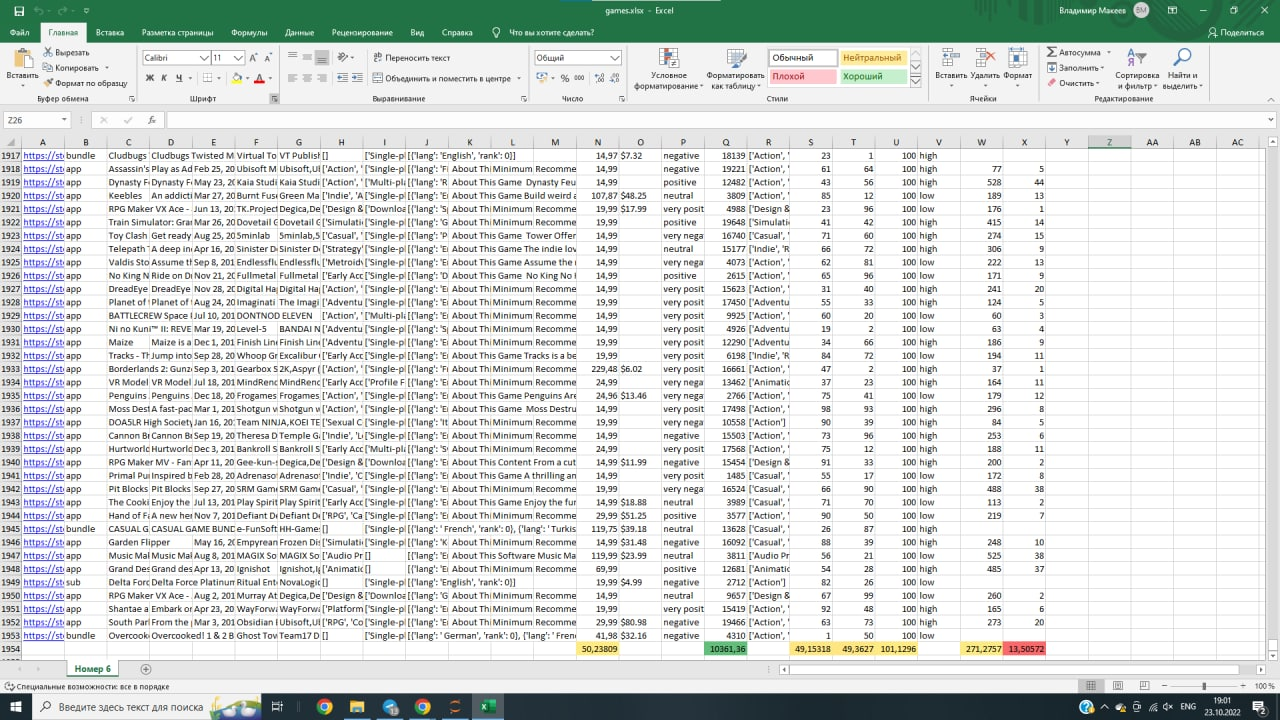

In [189]:
from IPython.display import Image
Image("photo_2022-10-23_19-02-25.jpg")

In [186]:
from openpyxl import load_workbook
 
FlName = r'games.xlsx'
 
# Сначала загрузите этот Excel только что создал
workbook = load_workbook(FlName)
 
# Просмотр листа в Excel, вывод является списком
sheet_names = workbook.sheetnames
# Добавить новый лист в Excel
workbook.create_sheet(title='Визуализация', index=1)


workbook.save(FlName)

In [187]:
import matplotlib.pyplot as plt
import xlwings as xw
import seaborn as sb
from matplotlib import pyplot as plt

workbook  = xw.Book('games.xlsx')
worksheet = workbook.sheets["Визуализация"]

fig, ax = plt.subplots()

sb.distplot(games_df_new['original_price'], hist=False, color='green', ax=ax)
max_y_val = list(ax.get_ylim())[1]
max_y_val
ax.vlines(23.3, 0, max_y_val, colors='green', linewidth = 0.5)
plt.title('график ядерной оценки плотности столбца original_price')

worksheet.pictures.add(fig, name='BarDiag', left=worksheet.range('F3').left)

worksheet2 = workbook.sheets["Номер 6"]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


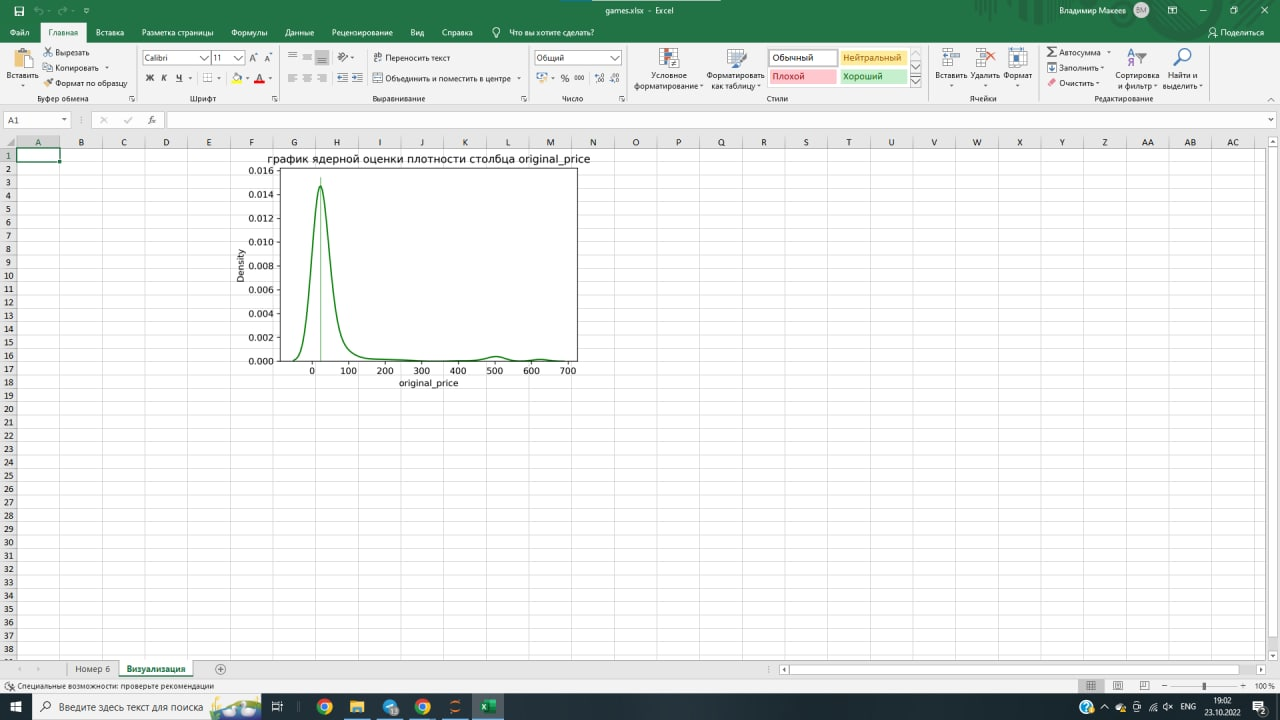

In [190]:
from IPython.display import Image
Image("photo_2022-10-23_19-03-38.jpg")